In [ ]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Load the chatbot feedback CSV
df = pd.read_csv(r"C:\Users\User\Documents\Thesis\SUS_evaluation\chatbot_feedback.csv")
df.head()


,The chatbot’s answers were clear and easy to understand,The chatbot’s answers were relevant to my questions,The chatbot maintained a natural and engaging tone,The chatbot helped me accomplish my goal,The chatbot provided accurate and useful information,The chatbot responded in a timely manner,The chatbot’s follow-up questions were helpful,"Overall, I am satisfied with my experience with the chatbot"
0,4,4,3,5,3,4,4,3
1,4,4,4,3,3,4,4,3
2,4,3,3,5,3,3,3,4
3,3,4,4,5,3,3,4,3
4,4,3,4,4,4,4,5,5


In [2]:
# Step 3: Basic summary statistics
print("Number of responses:", len(df))
print("\nAverage score per question:")
print(df.mean())

overall_avg = df.mean().mean()
print(f"\nOverall Chatbot Satisfaction Score: {overall_avg:.2f} / 5")


Number of responses: 30

Average score per question:
The chatbot’s answers were clear and easy to understand        3.966667
The chatbot’s answers were relevant to my questions            4.000000
The chatbot maintained a natural and engaging tone             4.066667
The chatbot helped me accomplish my goal                       4.233333
The chatbot provided accurate and useful information           3.833333
The chatbot responded in a timely manner                       3.833333
The chatbot’s follow-up questions were helpful                 4.033333
Overall, I am satisfied with my experience with the chatbot    3.966667
dtype: float64

Overall Chatbot Satisfaction Score: 3.99 / 5


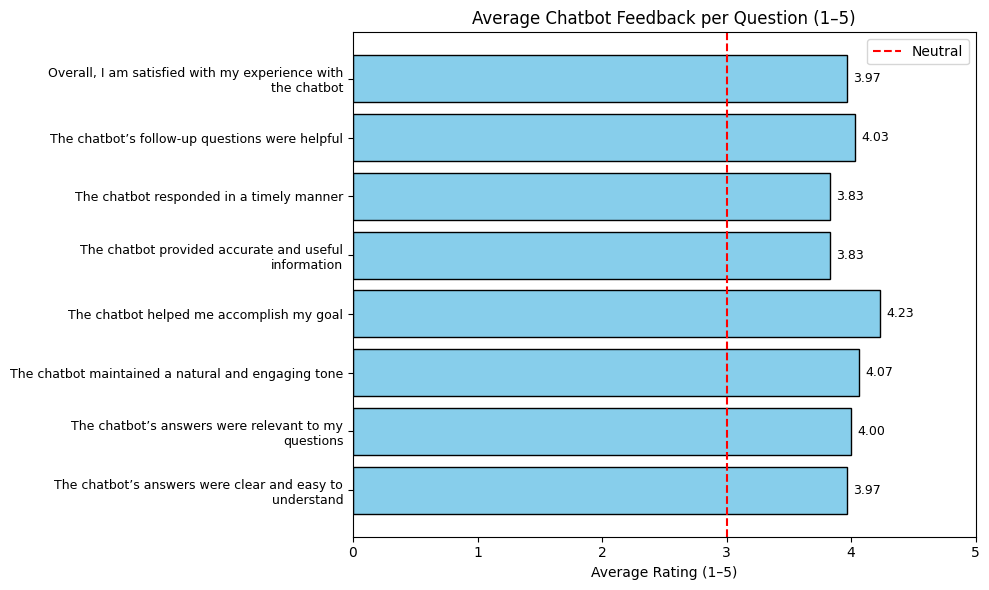

In [4]:
import textwrap

# Calculate means
means = df.mean()

# Wrap question text to max 50 characters per line
wrapped_labels = [ "\n".join(textwrap.wrap(q, width=50)) for q in df.columns ]

# Plot as horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(range(len(means)), means, color="skyblue", edgecolor="black")
plt.axvline(3, linestyle="--", color="red", label="Neutral")

# Add average values next to bars
for i, v in enumerate(means):
    plt.text(v + 0.05, i, f"{v:.2f}", va="center", fontsize=9)

plt.yticks(range(len(means)), wrapped_labels, fontsize=9)
plt.xlim(0, 5)
plt.xlabel("Average Rating (1–5)")
plt.title("Average Chatbot Feedback per Question (1–5)")
plt.legend()
plt.tight_layout()
plt.show()


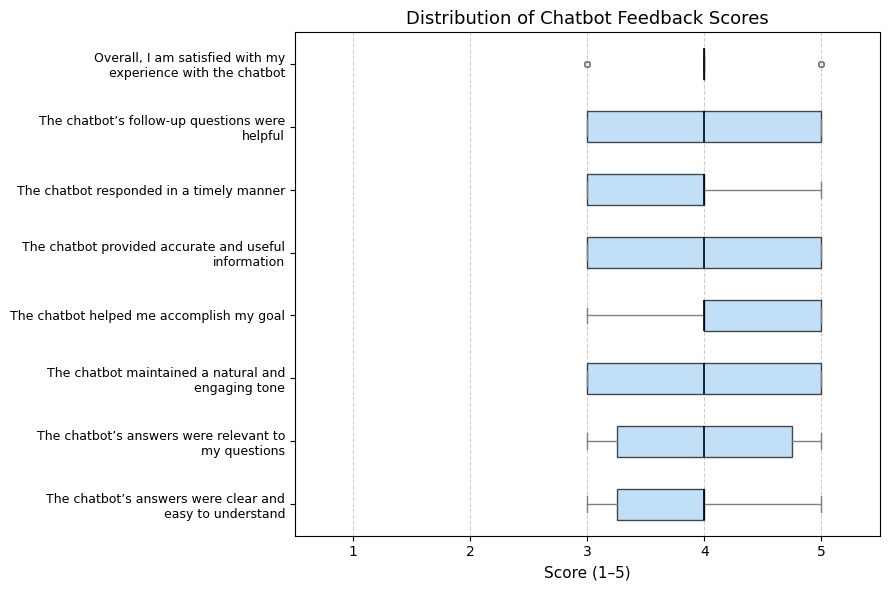

In [12]:
import textwrap
import pandas as pd
import matplotlib.pyplot as plt

# 1) choose only the numeric question columns (your 8 questions)
qcols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
data_list = [df[c].values for c in qcols]          # list of 1D arrays, one per question
wrapped_labels = ["\n".join(textwrap.wrap(c, width=40)) for c in qcols]

# 2) horizontal, clean box plot (set labels AFTER plotting)
fig, ax = plt.subplots(figsize=(9, 6))
bp = ax.boxplot(
    data_list,
    vert=False,
    patch_artist=True,
    medianprops=dict(color="black", linewidth=1.2),
    whiskerprops=dict(color="gray", linewidth=1),
    capprops=dict(color="gray", linewidth=1),
    flierprops=dict(marker='o', markersize=4, markerfacecolor='none',
                    markeredgecolor='gray', alpha=0.6)
)

# Color fill
for box in bp['boxes']:
    box.set_facecolor("#a7d3f5")   # light blue
    box.set_alpha(0.7)

# 3) labels + cosmetics
ax.set_yticks(range(1, len(wrapped_labels) + 1))
ax.set_yticklabels(wrapped_labels, fontsize=9)
ax.set_xlabel("Score (1–5)", fontsize=11)
ax.set_title("Distribution of Chatbot Feedback Scores", fontsize=13)
ax.set_xlim(0.5, 5.5)
ax.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [15]:
# Step 6: Interpretation helper
if overall_avg >= 4:
    print("✅ The chatbot is performing very well. Users are generally satisfied.")
elif overall_avg >= 3:
    print("⚠️ The chatbot is moderately good but has room for improvement.")
else:
    print("❌ The chatbot needs significant improvements based on user feedback.")


⚠️ The chatbot is moderately good but has room for improvement.
